In [1]:
import numpy as np

In [2]:
dup_check = []
mischka_hallmarks = {}
mischka_hallmarks["poly-A"] = []
mischka_hallmarks["TSD"] = []
mischka_hallmarks["both"] = []
mischka_hallmarks['neither'] = []
f = open("/nfs/turbo/jmkidddata/matt-projects/Stuff_For_Anthony/Identify_Hallmarks_From_Retrogenes/Scale_Up_2024_02_13/mischka/Retrogene_Output_dist_70.txt", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    chro, start, end, gene = line[0], line[1], line[2], line[4]
    retro = (chro, start, end, gene)
    check = (chro, start, end)
    if check in dup_check:
        continue
    dup_check.append(check)
    
    # is there a poly-A?
    poly_A_presence = False
    if line[5] != "N/A":
        poly_A_presence = True
        poly_A_tail = line[6]
    
    # is there a TSD
    TSD_presence = False
    if line[7] != "N/A":
        TSD_presence = True
        TSD = line[8]
    
    if poly_A_presence is False and TSD_presence is False:
        retro = (chro, start, end, gene)
        mischka_hallmarks['neither'].append(retro)
    elif poly_A_presence is True and TSD_presence is False:
        retro = (chro, start, end, gene, poly_A_tail)
        mischka_hallmarks['poly-A'].append(retro)
    elif poly_A_presence is False and TSD_presence is True:
        retro = (chro, start, end, gene, TSD)
        mischka_hallmarks['TSD'].append(retro)
    else:
        retro = (chro, start, end, gene, poly_A_tail, TSD)
        mischka_hallmarks['both'].append(retro)
f.close()

total_rcs = 0
hallmark = 0
for category, rcs in mischka_hallmarks.items():
    total_rcs += len(rcs)
for category, rcs in mischka_hallmarks.items():
    print(category, len(rcs), round(len(rcs) / total_rcs * 100, 2))
    if category != "neither":
        hallmark += len(rcs)
print("total:", total_rcs)
print("any hallmark:", hallmark, round(hallmark/total_rcs * 100, 2))

poly-A 34 0.97
TSD 2326 66.53
both 1086 31.06
neither 50 1.43
total: 3496
any hallmark: 3446 98.57


In [3]:
mischka_hallmarks

{'poly-A': [('chr11', '44034280', '44035305', 'TPT1', 'AAAAA'),
  ('chr12', '28305696', '28307025', 'ZCCHC17', 'TTTGGTTTT'),
  ('chr13', '59762159', '59763547', 'UBE2D3', 'TTTTT'),
  ('chr15', '32366395', '32367201', 'NUDT21', 'TTTTT'),
  ('chr17', '33323902', '33324164', 'KIF22', 'AAAAA'),
  ('chr2', '247336', '250006', 'HSP90AB1', 'AAAAATAAAAACTAAAAGTAAAA'),
  ('chr2', '32915223', '32917480', 'UBAP1', 'AAAAAAAA'),
  ('chr20', '25212971', '25213216', 'GAPDH', 'TTTATTTATTTT'),
  ('chr20', '50955686', '50956220', 'RPL10', 'AAAAAAAA'),
  ('chr21', '6609166', '6609622', 'CHCHD10', 'AAAAAAAAAA'),
  ('chr21', '17104813', '17105658', 'CCT3', 'TTTTTTTTTTTTTT'),
  ('chr22', '24226035', '24227600', 'LDHA', 'AAAAAAA'),
  ('chr23', '16758485', '16758878', 'MDH2', 'AAAAA'),
  ('chr23', '35937954', '35938422', 'EIF4B', 'AAAAA'),
  ('chr27', '40478666', '40478986', 'RPL17', 'TTTATTTTTTATTGTTTTATTTTT'),
  ('chr3', '14078652', '14080357', 'FKBP1A', 'TTTTTTTTTTTTTTTTT'),
  ('chr3', '32232662', '3223472

In [4]:
# mean vs. median lengths of the hallmarks

In [5]:
polyA_lengths = []
tsd_lengths = []
for retro in mischka_hallmarks['poly-A']:
    polyA_lengths.append(len(retro[4]))
for retro in mischka_hallmarks['TSD']:
    polyA_lengths.append(len(retro[4]))
for retro in mischka_hallmarks['both']:
    polyA_lengths.append(len(retro[4]))
    tsd_lengths.append(len(retro[5]))

In [6]:
np.mean(polyA_lengths), np.median(polyA_lengths)

(11.095763203714451, 9.0)

In [7]:
np.mean(tsd_lengths), np.median(tsd_lengths)

(11.139963167587476, 11.0)

In [8]:
(np.array(tsd_lengths) > 10).sum()

587

In [9]:
(np.array(tsd_lengths) > 10).sum() / len(tsd_lengths) * 100

54.05156537753223

In [10]:
# fullORF subset

In [11]:
fullORF = []
f = open("mischka.fullORF_retrocopies.sorted.txt", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    fullORF.append((line[0], line[1], line[2]))
f.close()
fullORF

[('chr1', '39885929', '39886834'),
 ('chr10', '45624521', '45626831'),
 ('chr11', '12175194', '12175911'),
 ('chr11', '42427400', '42429635'),
 ('chr11', '61894770', '61896533'),
 ('chr12', '11811454', '11812310'),
 ('chr12', '33514731', '33515690'),
 ('chr12', '39236779', '39237126'),
 ('chr12', '59331455', '59332748'),
 ('chr13', '7975753', '7977501'),
 ('chr13', '49216890', '49218432'),
 ('chr15', '7550735', '7552827'),
 ('chr15', '8944034', '8945119'),
 ('chr15', '46788486', '46789360'),
 ('chr16', '2316334', '2321340'),
 ('chr16', '13985503', '13985850'),
 ('chr18', '13507467', '13508372'),
 ('chr19', '36773904', '36774333'),
 ('chr20', '528373', '529701'),
 ('chr20', '5410644', '5411154'),
 ('chr20', '15470837', '15472906'),
 ('chr20', '49967489', '49968518'),
 ('chr21', '43534228', '43537015'),
 ('chr22', '49864307', '49865024'),
 ('chr23', '16592855', '16593753'),
 ('chr24', '16359571', '16360079'),
 ('chr24', '24640181', '24640730'),
 ('chr24', '32101391', '32102484'),
 ('chr2

In [12]:
len(fullORF)

66

In [13]:
fullORF_hallmarks = {}
fullORF_hallmarks["poly-A"] = []
fullORF_hallmarks["TSD"] = []
fullORF_hallmarks["both"] = []
fullORF_hallmarks['neither'] = []
f = open("/nfs/turbo/jmkidddata/matt-projects/Stuff_For_Anthony/Identify_Hallmarks_From_Retrogenes/Scale_Up_2024_02_13/mischka/Retrogene_Output_dist_70.txt", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    chro, start, end, gene = line[0], line[1], line[2], line[4]
    compare = (chro, start, end)
    if compare not in fullORF:
        continue
    # is there a poly-A?
    poly_A_presence = False
    if line[5] != "N/A":
        poly_A_presence = True
        poly_A_tail = line[6]
    
    # is there a TSD
    TSD_presence = False
    if line[7] != "N/A":
        TSD_presence = True
        TSD = line[8]
    
    if poly_A_presence is False and TSD_presence is False:
        retro = (chro, start, end, gene)
        fullORF_hallmarks['neither'].append(retro)
    elif poly_A_presence is True and TSD_presence is False:
        retro = (chro, start, end, gene, poly_A_tail)
        fullORF_hallmarks['poly-A'].append(retro)
    elif poly_A_presence is False and TSD_presence is True:
        retro = (chro, start, end, gene, TSD)
        fullORF_hallmarks['TSD'].append(retro)
    else:
        retro = (chro, start, end, gene, poly_A_tail, TSD)
        fullORF_hallmarks['both'].append(retro)
f.close()

total_rcs = 0
for category, rcs in fullORF_hallmarks.items():
    total_rcs += len(rcs)
print(total_rcs)
for category, rcs in fullORF_hallmarks.items():
    print(category, len(rcs), round(len(rcs) / total_rcs * 100, 2))

66
poly-A 0 0.0
TSD 41 62.12
both 25 37.88
neither 0 0.0


In [14]:
dogs = ['mischka', 'mCanLor1.2', 'china', 'nala', 'sandy', 'tasha', 'wags', 'yella', 'zoey']

In [15]:
dog_hallmarks = {}
total_both = 0
total_A = 0
total_TSD = 0
total_neither = 0
for dog in dogs:
    dog_hallmarks[dog] = {}
    dog_hallmarks[dog]["both"] = []
    dog_hallmarks[dog]["TSD"] = []
    dog_hallmarks[dog]["poly-A"] = []
    dog_hallmarks[dog]['neither'] = []
    dup_check = []
    f = open("/nfs/turbo/jmkidddata/matt-projects/Stuff_For_Anthony/Identify_Hallmarks_From_Retrogenes/Scale_Up_2024_02_13/{}/Retrogene_Output_dist_70.txt".format(dog), 'rt')
    inFile = f.readlines()
    for line in inFile:
        line = line.rstrip().split()
        chro, start, end, gene = line[0], line[1], line[2], line[4]
        retro = (chro, start, end, gene)
        check = (chro, start, end)
        if check in dup_check:
            continue
        dup_check.append(check)
        # is there a poly-A?
        poly_A_presence = False
        if line[5] != "N/A":
            poly_A_presence = True
            poly_A_tail = line[6]

        # is there a TSD
        TSD_presence = False
        if line[7] != "N/A":
            TSD_presence = True
            TSD = line[8]

        if poly_A_presence is False and TSD_presence is False:
            retro = (chro, start, end, gene)
            dog_hallmarks[dog]['neither'].append(retro)
        elif poly_A_presence is True and TSD_presence is False:
            retro = (chro, start, end, gene, poly_A_tail)
            dog_hallmarks[dog]['poly-A'].append(retro)
        elif poly_A_presence is False and TSD_presence is True:
            retro = (chro, start, end, gene, TSD)
            dog_hallmarks[dog]['TSD'].append(retro)
        else:
            retro = (chro, start, end, gene, poly_A_tail, TSD)
            dog_hallmarks[dog]['both'].append(retro)
    f.close()
    
    print(dog)
    total_rcs = 0
    hallmark = 0
    for category, rcs in dog_hallmarks[dog].items():
        total_rcs += len(rcs)
    print("total:", total_rcs)
    for category, rcs in dog_hallmarks[dog].items():
        print(category, len(rcs), round(len(rcs) / total_rcs * 100, 2), total_rcs)
        if category == "both":
            total_both += len(rcs)
        elif category == "TSD":
            total_TSD += len(rcs)
        elif category == "poly-A":
            total_A += len(rcs)
        elif category == "neither":
            total_neither += len(rcs)
        if category != "neither":
            hallmark += len(rcs)
    print("hallmarks", hallmark, round(hallmark/total_rcs * 100, 2))
    print()

mischka
total: 3496
both 1086 31.06 3496
TSD 2326 66.53 3496
poly-A 34 0.97 3496
neither 50 1.43 3496
hallmarks 3446 98.57

mCanLor1.2
total: 3493
both 1006 28.8 3493
TSD 2407 68.91 3493
poly-A 35 1.0 3493
neither 45 1.29 3493
hallmarks 3448 98.71

china
total: 3434
both 982 28.6 3434
TSD 2367 68.93 3434
poly-A 32 0.93 3434
neither 53 1.54 3434
hallmarks 3381 98.46

nala
total: 3543
both 1018 28.73 3543
TSD 2430 68.59 3543
poly-A 32 0.9 3543
neither 63 1.78 3543
hallmarks 3480 98.22

sandy
total: 3502
both 1024 29.24 3502
TSD 2393 68.33 3502
poly-A 34 0.97 3502
neither 51 1.46 3502
hallmarks 3451 98.54

tasha
total: 3328
both 1035 31.1 3328
TSD 2216 66.59 3328
poly-A 27 0.81 3328
neither 50 1.5 3328
hallmarks 3278 98.5

wags
total: 3307
both 960 29.03 3307
TSD 2260 68.34 3307
poly-A 33 1.0 3307
neither 54 1.63 3307
hallmarks 3253 98.37

yella
total: 3291
both 949 28.84 3291
TSD 2264 68.79 3291
poly-A 28 0.85 3291
neither 50 1.52 3291
hallmarks 3241 98.48

zoey
total: 3423
both 963 28.1

In [16]:
total_both, total_A, total_TSD, total_neither

(9023, 293, 21033, 468)

In [17]:
sum_total = total_both + total_A + total_TSD + total_neither

In [18]:
for cat in [total_both, total_A, total_TSD, total_neither]:
    print(round(cat/9, 1), round(cat/sum_total *  100, 2) )

1002.6 29.28
32.6 0.95
2337.0 68.25
52.0 1.52


In [19]:
# mean vs. median lengths of the hallmarks

In [20]:
# check other dogs
polyA_lengths = []
tsd_lengths = []
for dog, category in dog_hallmarks.items():
    for retro in category['poly-A']:
        polyA_lengths.append(len(retro[4]))
    for retro in category['TSD']:
        polyA_lengths.append(len(retro[4]))
    for retro in category['both']:
        polyA_lengths.append(len(retro[4]))
        tsd_lengths.append(len(retro[5]))

In [21]:
np.mean(polyA_lengths), np.median(polyA_lengths)

(11.030973013937857, 9.0)

In [22]:
np.mean(tsd_lengths), np.median(tsd_lengths)

(10.983708301008534, 11.0)

In [23]:
# fullORF, all assemblies

In [24]:
fullORF = {}
for dog in dogs:
    fullORF[dog] = []
    f = open("{}.fullORF_retrocopies.sorted.txt".format(dog), 'rt')
    inFile = f.readlines()
    for line in inFile:
        line = line.rstrip().split()
        fullORF[dog].append((line[0], line[1], line[2]))
    f.close()
fullORF

{'mischka': [('chr1', '39885929', '39886834'),
  ('chr10', '45624521', '45626831'),
  ('chr11', '12175194', '12175911'),
  ('chr11', '42427400', '42429635'),
  ('chr11', '61894770', '61896533'),
  ('chr12', '11811454', '11812310'),
  ('chr12', '33514731', '33515690'),
  ('chr12', '39236779', '39237126'),
  ('chr12', '59331455', '59332748'),
  ('chr13', '7975753', '7977501'),
  ('chr13', '49216890', '49218432'),
  ('chr15', '7550735', '7552827'),
  ('chr15', '8944034', '8945119'),
  ('chr15', '46788486', '46789360'),
  ('chr16', '2316334', '2321340'),
  ('chr16', '13985503', '13985850'),
  ('chr18', '13507467', '13508372'),
  ('chr19', '36773904', '36774333'),
  ('chr20', '528373', '529701'),
  ('chr20', '5410644', '5411154'),
  ('chr20', '15470837', '15472906'),
  ('chr20', '49967489', '49968518'),
  ('chr21', '43534228', '43537015'),
  ('chr22', '49864307', '49865024'),
  ('chr23', '16592855', '16593753'),
  ('chr24', '16359571', '16360079'),
  ('chr24', '24640181', '24640730'),
  ('c

In [25]:
fullORF_hallmarks = {}
for dog in dogs:
    fullORF_hallmarks[dog] = {}
    f = open("/nfs/turbo/jmkidddata/matt-projects/Stuff_For_Anthony/Identify_Hallmarks_From_Retrogenes/Scale_Up_2024_02_13/{}/Retrogene_Output_dist_70.txt".format(dog), 'rt')
    inFile = f.readlines()
    fullORF_hallmarks[dog]["both"] = []
    fullORF_hallmarks[dog]["TSD"] = []
    fullORF_hallmarks[dog]["poly-A"] = []
    fullORF_hallmarks[dog]['neither'] = []
    for line in inFile:
        line = line.rstrip().split()
        chro, start, end, gene = line[0], line[1], line[2], line[4]
        compare = (chro, start, end)
        if compare not in fullORF[dog]:
            continue

        # is there a poly-A?
        poly_A_presence = False
        if line[5] != "N/A":
            poly_A_presence = True
            poly_A_tail = line[6]

        # is there a TSD
        TSD_presence = False
        if line[7] != "N/A":
            TSD_presence = True
            TSD = line[8]

        if poly_A_presence is False and TSD_presence is False:
            retro = (chro, start, end, gene)
            fullORF_hallmarks[dog]['neither'].append(retro)
        elif poly_A_presence is True and TSD_presence is False:
            retro = (chro, start, end, gene, poly_A_tail)
            fullORF_hallmarks[dog]['poly-A'].append(retro)
        elif poly_A_presence is False and TSD_presence is True:
            retro = (chro, start, end, gene, TSD)
            fullORF_hallmarks[dog]['TSD'].append(retro)
        else:
            retro = (chro, start, end, gene, poly_A_tail, TSD)
            fullORF_hallmarks[dog]['both'].append(retro)
    f.close()

    print(dog)
    total_rcs = 0
    hallmark = 0
    for category, rcs in fullORF_hallmarks[dog].items():
        total_rcs += len(rcs)
    print("Total:", total_rcs)
    for category, rcs in fullORF_hallmarks[dog].items():
        print(category, len(rcs), round(len(rcs) / total_rcs * 100, 2))
        if category != "neither":
            hallmark += len(rcs)
    print("Any:", hallmark, round(hallmark/total_rcs *100, 2))
    print()

mischka
Total: 66
both 25 37.88
TSD 41 62.12
poly-A 0 0.0
neither 0 0.0
Any: 66 100.0

mCanLor1.2
Total: 59
both 21 35.59
TSD 36 61.02
poly-A 1 1.69
neither 1 1.69
Any: 58 98.31

china
Total: 49
both 15 30.61
TSD 33 67.35
poly-A 0 0.0
neither 1 2.04
Any: 48 97.96

nala
Total: 64
both 18 28.12
TSD 45 70.31
poly-A 0 0.0
neither 1 1.56
Any: 63 98.44

sandy
Total: 62
both 22 35.48
TSD 39 62.9
poly-A 1 1.61
neither 0 0.0
Any: 62 100.0

tasha
Total: 50
both 19 38.0
TSD 31 62.0
poly-A 0 0.0
neither 0 0.0
Any: 50 100.0

wags
Total: 51
both 18 35.29
TSD 32 62.75
poly-A 0 0.0
neither 1 1.96
Any: 50 98.04

yella
Total: 51
both 18 35.29
TSD 32 62.75
poly-A 1 1.96
neither 0 0.0
Any: 51 100.0

zoey
Total: 49
both 14 28.57
TSD 34 69.39
poly-A 0 0.0
neither 1 2.04
Any: 48 97.96



In [26]:
# generate fig 2c: bar graph of distribution of rcs + hallmarks 

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
count_rcs = []
count_any = []
count_both = []
count_TSD = []
count_A = []
count_none = []
for dog in dogs:
    print(dog)
    total_rcs = 0
    hallmark = 0
    total_both = 0
    total_TSD = 0
    total_A = 0
    total_neither = 0
    for category, rcs in dog_hallmarks[dog].items():
        total_rcs += len(rcs)
    print("total:", total_rcs)
    for category, rcs in dog_hallmarks[dog].items():
        print(category, len(rcs), round(len(rcs) / total_rcs * 100, 2))
        if category == "both":
            total_both += len(rcs)
        elif category == "TSD":
            total_TSD += len(rcs)
        elif category == "poly-A":
            total_A += len(rcs)
        elif category == "neither":
            total_neither += len(rcs)
        if category != "neither":
            hallmark += len(rcs)
    print("hallmarks", hallmark, round(hallmark/total_rcs * 100, 2))
    print()
    
    count_rcs.append(total_rcs)
    count_any.append(hallmark)
    count_both.append(total_both)
    count_TSD.append(total_TSD)
    count_A.append(total_A)
    count_none.append(total_neither)

mischka
total: 3496
both 1086 31.06
TSD 2326 66.53
poly-A 34 0.97
neither 50 1.43
hallmarks 3446 98.57

mCanLor1.2
total: 3493
both 1006 28.8
TSD 2407 68.91
poly-A 35 1.0
neither 45 1.29
hallmarks 3448 98.71

china
total: 3434
both 982 28.6
TSD 2367 68.93
poly-A 32 0.93
neither 53 1.54
hallmarks 3381 98.46

nala
total: 3543
both 1018 28.73
TSD 2430 68.59
poly-A 32 0.9
neither 63 1.78
hallmarks 3480 98.22

sandy
total: 3502
both 1024 29.24
TSD 2393 68.33
poly-A 34 0.97
neither 51 1.46
hallmarks 3451 98.54

tasha
total: 3328
both 1035 31.1
TSD 2216 66.59
poly-A 27 0.81
neither 50 1.5
hallmarks 3278 98.5

wags
total: 3307
both 960 29.03
TSD 2260 68.34
poly-A 33 1.0
neither 54 1.63
hallmarks 3253 98.37

yella
total: 3291
both 949 28.84
TSD 2264 68.79
poly-A 28 0.85
neither 50 1.52
hallmarks 3241 98.48

zoey
total: 3423
both 963 28.13
TSD 2370 69.24
poly-A 38 1.11
neither 52 1.52
hallmarks 3371 98.48



In [29]:
count_rcs, count_any, count_both, count_TSD, count_A, count_none

([3496, 3493, 3434, 3543, 3502, 3328, 3307, 3291, 3423],
 [3446, 3448, 3381, 3480, 3451, 3278, 3253, 3241, 3371],
 [1086, 1006, 982, 1018, 1024, 1035, 960, 949, 963],
 [2326, 2407, 2367, 2430, 2393, 2216, 2260, 2264, 2370],
 [34, 35, 32, 32, 34, 27, 33, 28, 38],
 [50, 45, 53, 63, 51, 50, 54, 50, 52])

In [30]:
dogs

['mischka',
 'mCanLor1.2',
 'china',
 'nala',
 'sandy',
 'tasha',
 'wags',
 'yella',
 'zoey']

In [31]:
capital_dogs = []
for dog in dogs:
    if dog != "mCanLor1.2":
        capital_dogs.append(dog.capitalize())
    else:
        capital_dogs.append(dog)
capital_dogs

['Mischka',
 'mCanLor1.2',
 'China',
 'Nala',
 'Sandy',
 'Tasha',
 'Wags',
 'Yella',
 'Zoey']

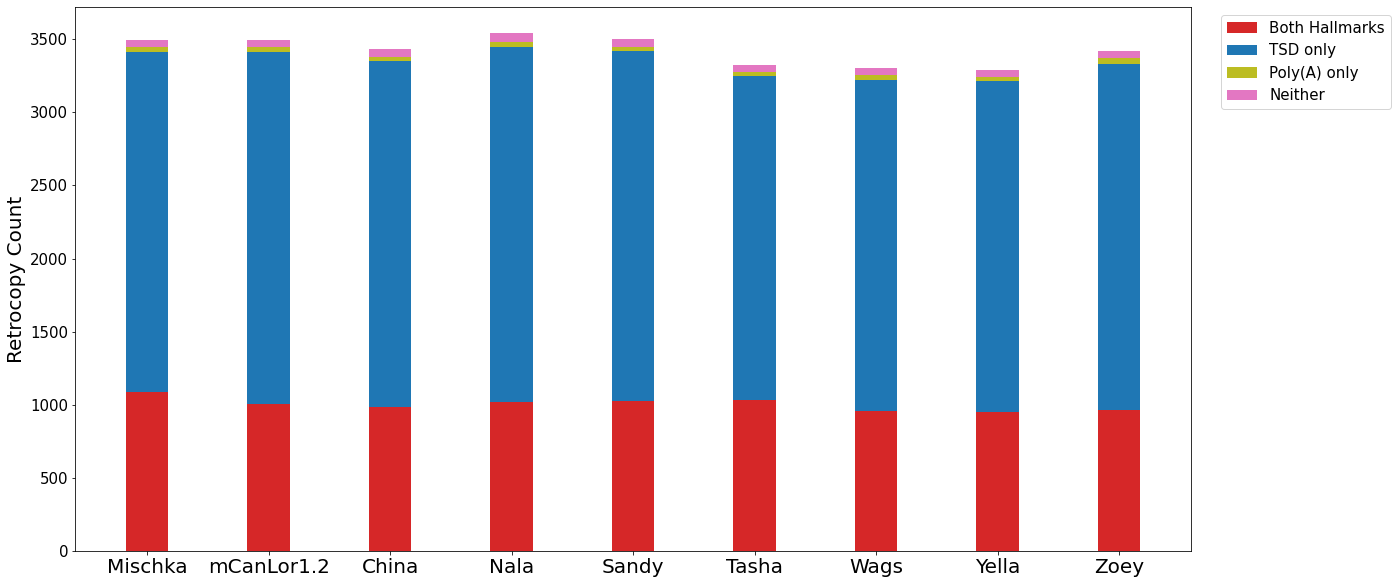

In [32]:
N = 9
ind = np.arange(N)   
width = 0.35 

bars_1 = np.add(count_both, count_TSD).tolist()
bars_2 = np.add(np.add(count_both, count_TSD), count_A).tolist()

fig = plt.subplots(figsize =(20, 10))
p1 = plt.bar(ind, count_both, width, color = "tab:red")
p2 = plt.bar(ind, count_TSD, width, bottom = count_both, color = "tab:blue")
p3 = plt.bar(ind, count_A, width, bottom = bars_1, color = "tab:olive")
p4 = plt.bar(ind, count_none, width, bottom = bars_2, color = "tab:pink")
 
plt.ylabel('Retrocopy Count', size = 20)
#plt.title('Retrocopy Count by Detected Hallmarks', size = 20)
plt.xticks(ind, capital_dogs, size = 20)
plt.yticks(size=15)
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Both Hallmarks', 'TSD only', 'Poly(A) only', 'Neither'), bbox_to_anchor=(1.02, 1), fontsize=15)
plt.savefig("/nfs/turbo/jmkiddscr/anthony-projects/final_mischka_paper_files/Figure_2c.jpg",bbox_inches="tight",dpi=300)

plt.show()

In [33]:
# make histogram of tsd length + polyA lengths

In [34]:
# check other dogs
polyA_lengths = []
tsd_lengths = []
for dog, category in dog_hallmarks.items():
    for retro in category['poly-A']:
        polyA_lengths.append(len(retro[4]))
    for retro in category['TSD']:
        polyA_lengths.append(len(retro[4]))
    for retro in category['both']:
        polyA_lengths.append(len(retro[4]))
        tsd_lengths.append(len(retro[5]))

In [35]:
polyA_lengths

[5,
 9,
 5,
 5,
 5,
 23,
 8,
 12,
 8,
 10,
 14,
 7,
 5,
 5,
 24,
 17,
 10,
 6,
 39,
 13,
 68,
 5,
 21,
 8,
 5,
 19,
 44,
 111,
 11,
 9,
 10,
 12,
 6,
 10,
 11,
 6,
 6,
 11,
 6,
 10,
 5,
 6,
 5,
 12,
 5,
 15,
 5,
 6,
 7,
 7,
 12,
 5,
 5,
 6,
 5,
 5,
 6,
 6,
 6,
 8,
 16,
 12,
 15,
 17,
 7,
 15,
 13,
 5,
 9,
 16,
 15,
 6,
 6,
 5,
 11,
 5,
 11,
 11,
 13,
 6,
 6,
 16,
 12,
 5,
 5,
 5,
 10,
 7,
 23,
 8,
 17,
 13,
 15,
 5,
 5,
 6,
 5,
 6,
 6,
 7,
 10,
 18,
 6,
 14,
 6,
 11,
 7,
 8,
 5,
 5,
 6,
 10,
 17,
 6,
 5,
 8,
 19,
 15,
 12,
 9,
 7,
 7,
 15,
 22,
 15,
 5,
 10,
 14,
 7,
 16,
 15,
 6,
 9,
 14,
 12,
 5,
 15,
 12,
 9,
 6,
 17,
 6,
 11,
 13,
 9,
 15,
 11,
 14,
 16,
 7,
 20,
 17,
 6,
 13,
 5,
 7,
 6,
 16,
 15,
 15,
 6,
 9,
 11,
 15,
 7,
 5,
 7,
 37,
 5,
 7,
 19,
 7,
 18,
 8,
 6,
 5,
 5,
 18,
 11,
 14,
 5,
 9,
 13,
 11,
 9,
 6,
 10,
 17,
 7,
 33,
 6,
 11,
 9,
 8,
 5,
 14,
 6,
 7,
 14,
 20,
 8,
 13,
 22,
 6,
 5,
 6,
 16,
 14,
 6,
 12,
 15,
 17,
 6,
 7,
 6,
 18,
 6,
 6,
 6,
 9,
 15,
 18,
 7,
 12,

In [36]:
len(polyA_lengths), len(tsd_lengths)

(30349, 9023)

In [37]:
#determine counts
polyA_dist = {}
for i in range(5,50):
    polyA_dist[i] = np.count_nonzero(np.array(polyA_lengths) == i)
polyA_dist["50+"] = np.count_nonzero(np.array(polyA_lengths) >= 50) # everything with a tail longer than 50 is added to 50 category

In [38]:
polyA_dist

{5: 4071,
 6: 4918,
 7: 3160,
 8: 1912,
 9: 1601,
 10: 1547,
 11: 1359,
 12: 1334,
 13: 1531,
 14: 1618,
 15: 1682,
 16: 1666,
 17: 934,
 18: 524,
 19: 389,
 20: 274,
 21: 246,
 22: 206,
 23: 203,
 24: 160,
 25: 96,
 26: 77,
 27: 64,
 28: 57,
 29: 56,
 30: 62,
 31: 78,
 32: 35,
 33: 24,
 34: 44,
 35: 43,
 36: 21,
 37: 15,
 38: 37,
 39: 56,
 40: 9,
 41: 46,
 42: 14,
 43: 22,
 44: 17,
 45: 16,
 46: 7,
 47: 11,
 48: 11,
 49: 7,
 '50+': 89}

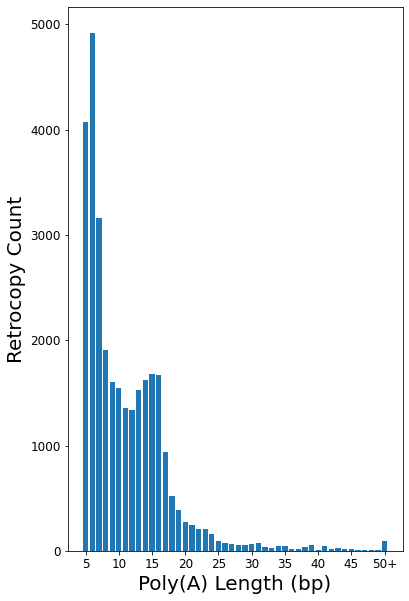

In [39]:
ind = np.arange(46) 
plt.figure(figsize=(6,10))
plt.bar(ind, polyA_dist.values())
groupings = np.arange(5,51)
x_pos = [i for i, _ in enumerate(groupings)]
plt.xticks(x_pos[::5], list(polyA_dist.keys())[::5], size=12)
plt.yticks(size=12)
#plt.title("Distribution of poly-A lengths of retrocopies", size=20)
plt.xlabel("Poly(A) Length (bp)", size=20)
plt.ylabel("Retrocopy Count", size=20)
plt.savefig("/nfs/turbo/jmkiddscr/anthony-projects/final_mischka_paper_files/Figure_2d.jpg",dpi=300,bbox_inches='tight')
plt.show()

In [39]:
#determine counts
tsd_dist = {}
for i in range(5,50):
    tsd_dist[i] = np.count_nonzero(np.array(tsd_lengths) == i)
tsd_dist["50+"] = np.count_nonzero(np.array(tsd_lengths) >= 50) 
tsd_dist
# everything with a tail longer than 50 is added to 50 category

{5: 929,
 6: 1246,
 7: 795,
 8: 579,
 9: 359,
 10: 382,
 11: 428,
 12: 467,
 13: 577,
 14: 777,
 15: 898,
 16: 844,
 17: 400,
 18: 161,
 19: 54,
 20: 13,
 21: 49,
 22: 11,
 23: 2,
 24: 7,
 25: 23,
 26: 2,
 27: 0,
 28: 1,
 29: 1,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 1,
 37: 0,
 38: 0,
 39: 0,
 40: 1,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 7,
 47: 0,
 48: 1,
 49: 0,
 '50+': 8}

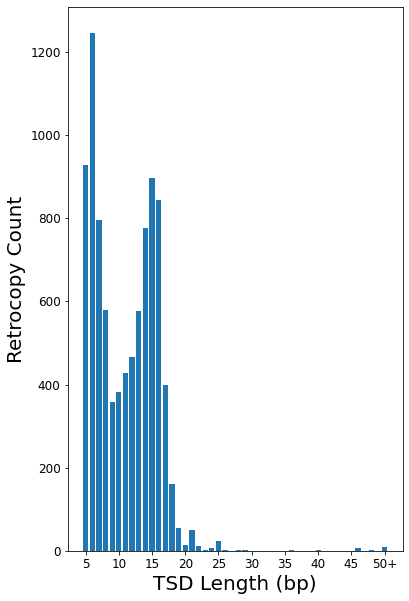

In [40]:
ind = np.arange(46) 
plt.figure(figsize=(6,10))
plt.bar(ind, tsd_dist.values())
groupings = np.arange(5,51)
x_pos = [i for i, _ in enumerate(groupings)]
plt.xticks(x_pos[::5], list(polyA_dist.keys())[::5], size=12)
plt.yticks(size=12)
#plt.title("Distribution of TSD lengths of retrocopies", size=20)
plt.xlabel("TSD Length (bp)", size=20)
plt.ylabel("Retrocopy Count", size=20)
plt.savefig("/nfs/turbo/jmkiddscr/anthony-projects/final_mischka_paper_files/Figure_2e.jpg", bbox_inches='tight',dpi=300)
plt.show()

In [1]:
# chr length vs rc presence - supp fig 

In [1]:
import matplotlib.pyplot as plt

In [2]:
chrom_size = {}
f = open("UU_Cfam_GSD_1.0_ROSY.chrom.sizes", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    chro = line[0]
    if "chrY" in chro or "chrUn" in chro or "chrM" in chro:
        continue
    chrom_size[line[0]] = int(line[1])
f.close()
chrom_size

{'chr1': 123556469,
 'chr2': 84979418,
 'chr3': 92479059,
 'chr4': 89535178,
 'chr5': 89562946,
 'chr6': 78113029,
 'chr7': 81081596,
 'chr8': 76405709,
 'chr9': 61171909,
 'chr10': 70643054,
 'chr11': 74805798,
 'chr12': 72970719,
 'chr13': 64299765,
 'chr14': 61112200,
 'chr15': 64676183,
 'chr16': 60362399,
 'chr17': 65088165,
 'chr18': 56472973,
 'chr19': 55516201,
 'chr20': 58627490,
 'chr21': 51742555,
 'chr22': 61573679,
 'chr23': 53134997,
 'chr24': 48566227,
 'chr25': 51730745,
 'chr26': 39257614,
 'chr27': 46662488,
 'chr28': 41733330,
 'chr29': 42517134,
 'chr30': 40643782,
 'chr31': 39901454,
 'chr32': 40225481,
 'chr33': 32139216,
 'chr34': 42397973,
 'chr35': 28051305,
 'chr36': 31223415,
 'chr37': 30785915,
 'chr38': 24803098,
 'chrX': 124992030}

In [3]:
mischka_retros_by_chro = {}
f = open("mischka.blat_retrocopies_assembled.sorted.txt", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    chro = line[0]
    if chro not in mischka_retros_by_chro.keys():
        mischka_retros_by_chro[chro] = []
    mischka_retros_by_chro[chro].append(tuple(line))
f.close()
mischka_retros_by_chro

{'chr1': [('chr1', '325443', '330783', '+', 'ZFR'),
  ('chr1', '408403', '409542', '-', 'SNX3'),
  ('chr1', '737234', '737714', '-', 'RPS17'),
  ('chr1', '5129446', '5129882', '-', 'RPL34'),
  ('chr1', '5321743', '5324308', '+', 'MAPRE1'),
  ('chr1', '5723596', '5724821', '-', 'USP49'),
  ('chr1', '6681571', '6682924', '+', 'NPM1'),
  ('chr1', '6863076', '6864098', '-', 'MTCH2'),
  ('chr1', '6892121', '6892855', '+', 'TEX35'),
  ('chr1', '7316394', '7317488', '-', 'GAPDH'),
  ('chr1', '8098375', '8098750', '-', 'RPL31'),
  ('chr1', '9335741', '9337412', '+', 'HNRNPC'),
  ('chr1', '10073974', '10074431', '+', 'NME1'),
  ('chr1', '12966881', '12967310', '+', 'RPL31'),
  ('chr1', '13071355', '13071537', '-', 'NTPCR'),
  ('chr1', '14211120', '14211771', '+', 'BTF3'),
  ('chr1', '14743647', '14744381', '+', 'PPIA'),
  ('chr1', '14868551', '14869191', '+', 'RPL29'),
  ('chr1', '16250498', '16251091', '+', 'RPL17'),
  ('chr1', '16393477', '16394886', '+', 'ST13'),
  ('chr1', '19233451', '1923

In [4]:
total = 0
for chro, retros in mischka_retros_by_chro.items():
    total += len(retros)
total

3658

In [5]:
mischka_retros_by_chro.keys()

dict_keys(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21', 'chr22', 'chr23', 'chr24', 'chr25', 'chr26', 'chr27', 'chr28', 'chr29', 'chr3', 'chr30', 'chr31', 'chr32', 'chr33', 'chr34', 'chr35', 'chr36', 'chr37', 'chr38', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chrX'])

In [6]:
mischka_retro_count = []
mischka_chrom_length = []
for chro, rcs in mischka_retros_by_chro.items():
    mischka_retro_count.append(len(rcs))
    mischka_chrom_length.append(chrom_size[chro])

In [7]:
mischka_retro_count

[191,
 121,
 119,
 99,
 89,
 89,
 83,
 121,
 95,
 75,
 87,
 106,
 82,
 97,
 85,
 86,
 46,
 94,
 53,
 79,
 53,
 69,
 134,
 66,
 51,
 106,
 43,
 54,
 37,
 41,
 40,
 37,
 140,
 107,
 111,
 124,
 153,
 89,
 306]

In [8]:
mischka_chrom_length

[123556469,
 70643054,
 74805798,
 72970719,
 64299765,
 61112200,
 64676183,
 60362399,
 65088165,
 56472973,
 55516201,
 84979418,
 58627490,
 51742555,
 61573679,
 53134997,
 48566227,
 51730745,
 39257614,
 46662488,
 41733330,
 42517134,
 92479059,
 40643782,
 39901454,
 40225481,
 32139216,
 42397973,
 28051305,
 31223415,
 30785915,
 24803098,
 89535178,
 89562946,
 78113029,
 81081596,
 76405709,
 61171909,
 124992030]

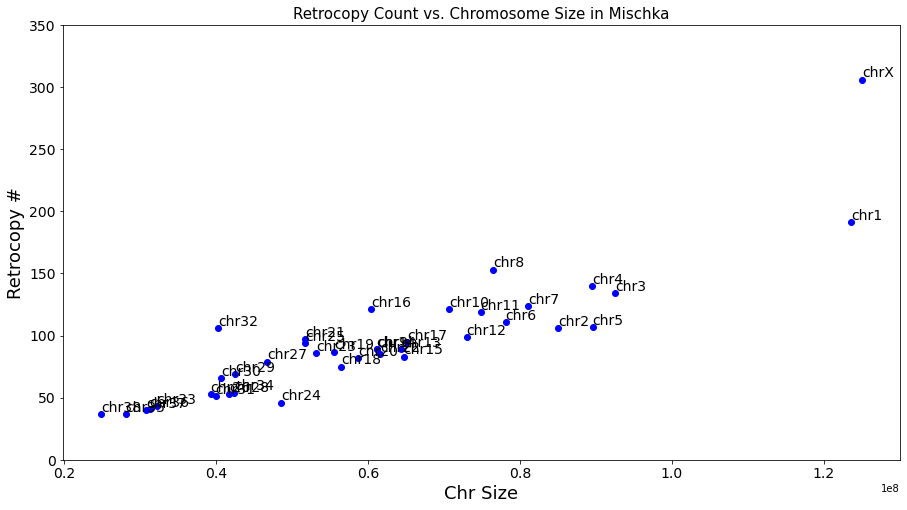

In [11]:
plt.figure(figsize=(15,8))
for i in range(len(mischka_chrom_length)):
    plt.plot(mischka_chrom_length[i], mischka_retro_count[i],'bo')
    plt.text(mischka_chrom_length[i] + 2, mischka_retro_count[i] + 2, list(mischka_retros_by_chro.keys())[i], fontsize = 14)
plt.xlabel('Chr Size',  fontsize = 18)
plt.ylabel('Retrocopy #', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(0,350)
plt.title("Retrocopy Count vs. Chromosome Size in Mischka", fontsize = 15)
plt.savefig("/home/antnguye/links/jmkiddscratch/final_mischka_paper_files/suppfig_3A.jpg", dpi=300, bbox_inches = 'tight')

In [ ]:
# see permute_1000.sb

In [12]:
permutations_set = {chro:0 for chro in mischka_retros_by_chro.keys()}
chrX_set = []
for i in range(1000):
    f = open("permutations/mischka.retrocopy_permute.{}:.txt".format(str(i + 1)), 'rt')
    inFile = f.readlines()
    chrX_count = 0
    for line in inFile:
        line = line.rstrip().split()
        chro = line[0]
        permutations_set[chro] += 1
        if chro == "chrX":
            chrX_count += 1
    f.close()
    chrX_set.append(chrX_count)
permutations_avg = []
for chro, count in permutations_set.copy().items():
    permutations_avg.append(count/1000)
permutations_avg

[191.681,
 109.336,
 116.495,
 113.114,
 99.783,
 95.228,
 100.18,
 93.895,
 100.856,
 88.115,
 86.384,
 132.479,
 91.806,
 80.148,
 95.256,
 82.589,
 75.101,
 80.64,
 61.251,
 72.715,
 64.836,
 66.195,
 144.092,
 62.969,
 62.088,
 62.516,
 49.995,
 65.748,
 43.399,
 48.778,
 47.637,
 38.563,
 138.843,
 139.287,
 121.77,
 125.742,
 118.57,
 95.25,
 194.67]

In [13]:
permutations_avg[7], mischka_retro_count[7]

(93.895, 121)

In [14]:
permutations_avg[31], mischka_retro_count[31]

(38.563, 37)

In [15]:
chrX_set

[184,
 169,
 219,
 186,
 199,
 192,
 197,
 191,
 206,
 207,
 200,
 189,
 176,
 200,
 192,
 212,
 216,
 195,
 187,
 223,
 172,
 177,
 206,
 207,
 179,
 170,
 188,
 188,
 191,
 195,
 172,
 195,
 181,
 197,
 216,
 181,
 216,
 192,
 210,
 194,
 176,
 184,
 201,
 209,
 187,
 188,
 213,
 198,
 215,
 185,
 203,
 163,
 178,
 199,
 201,
 184,
 177,
 176,
 184,
 209,
 197,
 212,
 187,
 194,
 174,
 205,
 199,
 218,
 197,
 195,
 173,
 191,
 195,
 246,
 197,
 186,
 199,
 208,
 191,
 208,
 206,
 200,
 201,
 206,
 212,
 164,
 209,
 206,
 191,
 187,
 243,
 206,
 201,
 177,
 211,
 191,
 207,
 180,
 182,
 220,
 221,
 197,
 176,
 207,
 210,
 186,
 224,
 193,
 202,
 200,
 220,
 182,
 182,
 198,
 208,
 197,
 188,
 184,
 181,
 210,
 187,
 200,
 216,
 183,
 174,
 180,
 213,
 190,
 213,
 174,
 197,
 189,
 203,
 181,
 173,
 186,
 179,
 195,
 208,
 191,
 201,
 176,
 183,
 202,
 178,
 191,
 187,
 191,
 211,
 183,
 209,
 165,
 186,
 193,
 182,
 194,
 234,
 189,
 188,
 212,
 204,
 204,
 192,
 177,
 192,
 170,
 199

In [16]:
max(chrX_set)

250

In [17]:
222/1888

0.11758474576271187

In [18]:
sum(permutations_avg)

3658.0000000000005

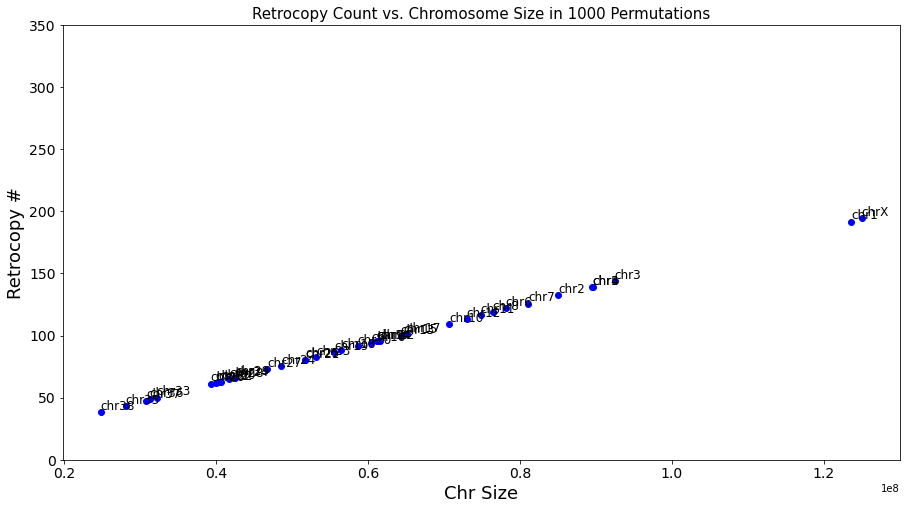

In [20]:
plt.figure(figsize=(15,8))
for i in range(len(mischka_chrom_length)):
    plt.plot(mischka_chrom_length[i], permutations_avg[i],'bo')
    plt.text(mischka_chrom_length[i] + 2, permutations_avg[i] + 2, list(mischka_retros_by_chro.keys())[i],fontsize = 12)
plt.xlabel('Chr Size', fontsize = 18)
plt.ylabel('Retrocopy #', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(0,350)
plt.title("Retrocopy Count vs. Chromosome Size in 1000 Permutations", fontsize = 15)
plt.savefig("/home/antnguye/links/jmkiddscratch/final_mischka_paper_files/suppfig_3B.jpg", dpi=300, bbox_inches='tight')